In [1]:
import pandas as pd
import numpy as np
from io import BytesIO
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
link = 'https://docs.google.com/spreadsheets/d/1e_HRjtXHhX6ZSmfQ_dFcqSnndyxrzRi4Zd3opRzTtrg' + '/export?format=csv'

In [3]:
link

'https://docs.google.com/spreadsheets/d/1e_HRjtXHhX6ZSmfQ_dFcqSnndyxrzRi4Zd3opRzTtrg/export?format=csv'

In [4]:
req = requests.get(link)
data = req.content

df = pd.read_csv(BytesIO(data))

In [5]:
sns.set(
    font_scale = 1, # размер шрифта
    style = 'whitegrid', # внешний вид графика
    rc = {'figure.figsize':(18,7)} # Размер графика
)

In [6]:
df['Отметка времени'].apply(lambda x: len(x))

0     19
1     19
2     18
3     19
4     19
5     19
6     19
7     19
8     19
9     19
10    19
11    19
12    19
13    19
14    19
15    19
16    18
17    18
18    18
19    18
20    19
21    18
22    19
23    19
24    19
25    19
26    19
27    19
28    19
29    19
30    18
31    18
32    18
33    18
34    18
35    18
36    18
37    18
38    19
39    19
40    19
41    18
42    19
43    18
44    19
45    19
46    19
47    19
48    19
49    18
50    19
51    19
52    19
53    18
54    19
Name: Отметка времени, dtype: int64

# 1. Первичный анализ респондентов

In [7]:
df.shape

(55, 158)

##### 1.1 84% Респондентов состоят в романтических отношениях

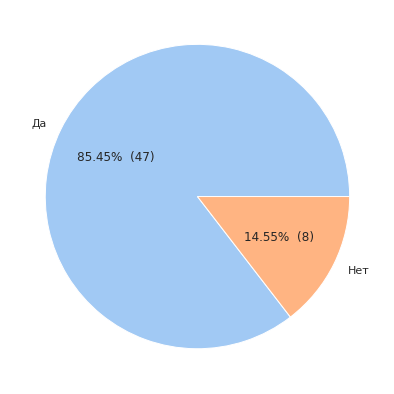

In [8]:
data = df['Состоите ли Вы в данный момент в романтических отношениях (не в браке/ не проживаете с партнёром)?'].value_counts()
keys = ['Да','Нет']
  
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

colors = sns.color_palette('pastel')[0:5]    
    
plt.pie(data, labels=keys, colors = colors, autopct=make_autopct(data))
  
plt.show()

In [9]:
df_clean = df[df['Состоите ли Вы в данный момент в романтических отношениях (не в браке/ не проживаете с партнёром)?'] == "Да"]
df_clean.shape

(47, 158)

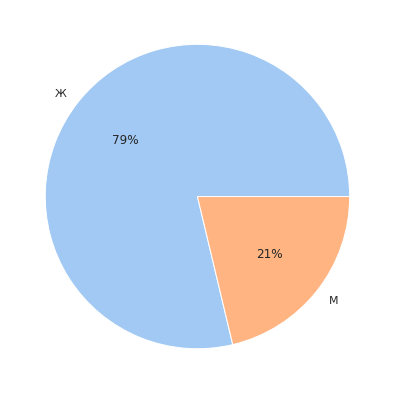

In [10]:
data = df_clean['Ваш пол:'].value_counts()
keys = ['Ж', 'М']
     
plt.pie(data, labels=keys, colors = colors, autopct='%.0f%%')
  
plt.show()


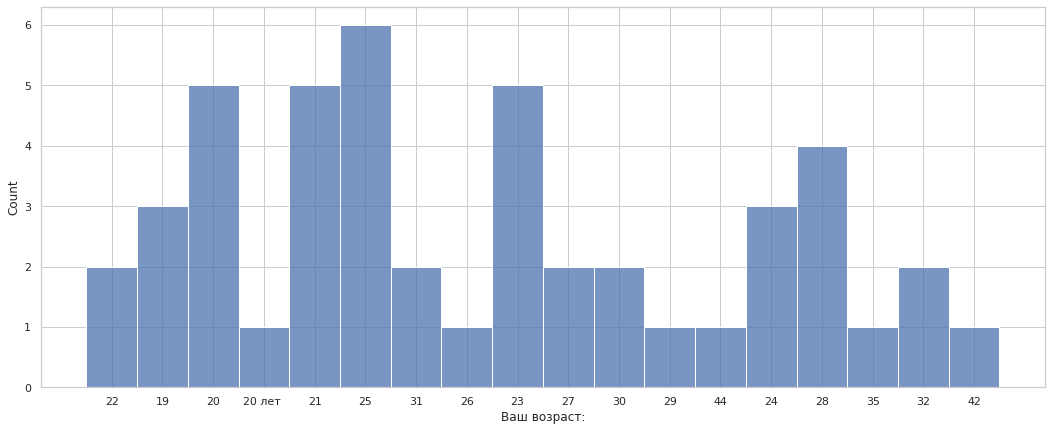

In [11]:
sns.histplot(data = df_clean, x = 'Ваш возраст:')

In [12]:
df_clean['Ваш возраст:'] = df_clean['Ваш возраст:'].replace(['20 лет '], '20')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


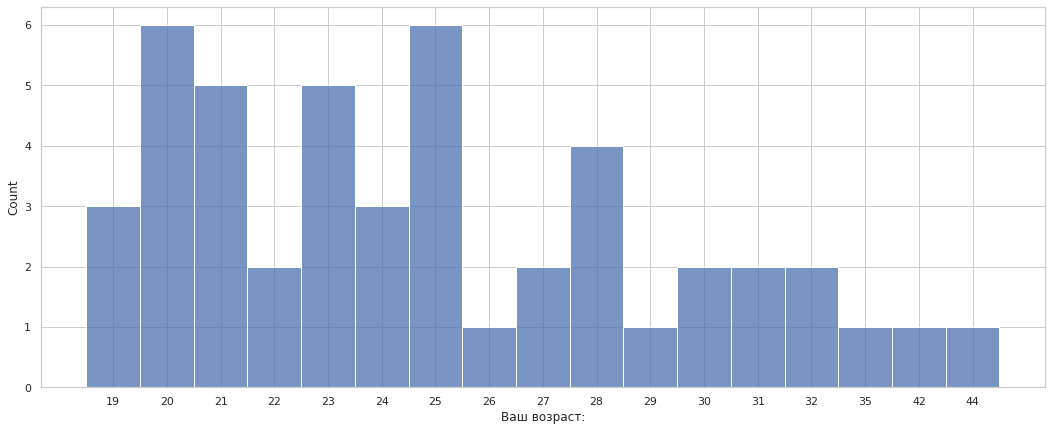

In [13]:
sns.histplot(data = df_clean.sort_values('Ваш возраст:'), x = 'Ваш возраст:')

### Опросник 1

In [14]:
Thomas_Kilman = df_clean.iloc[:,0:34]

In [15]:
Thomas_Kilman = Thomas_Kilman.drop(['Отметка времени','Состоите ли Вы в данный момент в романтических отношениях (не в браке/ не проживаете с партнёром)?'], axis = 1)

In [16]:
Thomas_Kilman.head()

,Ваш возраст:,Ваш пол:,1.,2.,3.,4.,5.,6.,7.,8.,...,21.,22.,23.,24.,25.,26.,27.,28.,29.,30.
0,22,Ж,В. Я стараюсь подчеркнуть общее в наших позици...,В. Я пытаюсь учесть все интересы: свои и оппон...,В. Иногда я могу утешать других и пытаться сох...,А. Я пытаюсь найти компромиссное решение.,"В. Я пытаюсь сделать все возможное, чтобы избе...",А. Я пытаюсь не создавать себе репутацию непри...,"В. Я жертвую одними выгодами, чтобы получить в...",В. Я пытаюсь сразу же открыто обсудить все инт...,...,В. Я больше склонен к непосредственному и откр...,"А. Я стараюсь найти позицию, находящуюся между...",А. Очень часто я стараюсь удовлетворить все ин...,В. Я пытаюсь склонить оппонента к компромиссу.,В. При подготовке к переговорам я пытаюсь учит...,В. Я почти всегда пытаюсь удовлетворить все по...,В. Я позволяю оппоненту придерживаться своего ...,А. Обычно я твердо стою на своем.,"А. Я предлагаю вариант «ни вам, ни нам».",В. Я всегда стараюсь найти решение проблемы со...
2,19,Ж,А. Иногда я предоставляю право решать проблему...,В. Я пытаюсь учесть все интересы: свои и оппон...,В. Иногда я могу утешать других и пытаться сох...,А. Я пытаюсь найти компромиссное решение.,"В. Я пытаюсь сделать все возможное, чтобы избе...",А. Я пытаюсь не создавать себе репутацию непри...,"В. Я жертвую одними выгодами, чтобы получить в...",В. Я пытаюсь сразу же открыто обсудить все инт...,...,В. Я больше склонен к непосредственному и откр...,"А. Я стараюсь найти позицию, находящуюся между...",А. Очень часто я стараюсь удовлетворить все ин...,"А. Я стараюсь пойти навстречу оппоненту, если ...",В. При подготовке к переговорам я пытаюсь учит...,В. Я почти всегда пытаюсь удовлетворить все по...,"А. Иногда я избегаю занимать позицию, ведущую ...",В. При выработке решения я постоянно ищу помощ...,"В. Я чувствую, что различия в позициях не всег...",В. Я всегда стараюсь найти решение проблемы со...
3,20,Ж,В. Я стараюсь подчеркнуть общее в наших позици...,В. Я пытаюсь учесть все интересы: свои и оппон...,В. Иногда я могу утешать других и пытаться сох...,А. Я пытаюсь найти компромиссное решение.,А. При выработке решения ищу помощи со стороны...,А. Я пытаюсь не создавать себе репутацию непри...,"А. Я пытаюсь отложить решение вопроса, чтобы и...",В. Я пытаюсь сразу же открыто обсудить все инт...,...,А. При подготовке к переговорам я стараюсь учи...,"А. Я стараюсь найти позицию, находящуюся между...",А. Очень часто я стараюсь удовлетворить все ин...,"А. Я стараюсь пойти навстречу оппоненту, если ...",В. При подготовке к переговорам я пытаюсь учит...,"А. Я предлагаю вариант «ни вам, ни нам».",В. Я позволяю оппоненту придерживаться своего ...,В. При выработке решения я постоянно ищу помощ...,"А. Я предлагаю вариант «ни вам, ни нам».",В. Я всегда стараюсь найти решение проблемы со...
4,20,Ж,В. Я стараюсь подчеркнуть общее в наших позици...,А. Я пытаюсь найти компромиссное решение.,В. Иногда я могу утешать других и пытаться сох...,А. Я пытаюсь найти компромиссное решение.,"В. Я пытаюсь сделать все возможное, чтобы избе...",А. Я пытаюсь не создавать себе репутацию непри...,"А. Я пытаюсь отложить решение вопроса, чтобы и...",В. Я пытаюсь сразу же открыто обсудить все инт...,...,В. Я больше склонен к непосредственному и откр...,"А. Я стараюсь найти позицию, находящуюся между...",А. Очень часто я стараюсь удовлетворить все ин...,В. Я пытаюсь склонить оппонента к компромиссу.,В. При подготовке к переговорам я пытаюсь учит...,В. Я почти всегда пытаюсь удовлетворить все по...,"А. Иногда я избегаю занимать позицию, ведущую ...",В. При выработке решения я постоянно ищу помощ...,"В. Я чувствую, что различия в позициях не всег...",В. Я всегда стараюсь найти решение проблемы со...
5,19,Ж,А. Иногда я предоставляю право решать проблему...,А. Я пытаюсь найти компромиссное решение.,В. Иногда я могу утешать других и пытаться сох...,А. Я пытаюсь найти компромиссное решение.,"В. Я пытаюсь сделать все возможное, чтобы избе...",А. Я пытаюсь не создавать себе репутацию непри...,"А. Я пытаюсь отложит

In [17]:
for i in Thomas_Kilman:
    if i == 'Ваш возраст:' or i == 'Ваш пол:':
        continue
    else:
        Thomas_Kilman[i] = Thomas_Kilman[i].str[0:1]

In [18]:
Thomas_Kilman.columns = Thomas_Kilman.columns.str.strip()

In [19]:
Thomas_Kilman.head()

,Ваш возраст:,Ваш пол:,1.,2.,3.,4.,5.,6.,7.,8.,...,21.,22.,23.,24.,25.,26.,27.,28.,29.,30.
0,22,Ж,В,В,В,А,В,А,В,В,...,В,А,А,В,В,В,В,А,А,В
2,19,Ж,А,В,В,А,В,А,В,В,...,В,А,А,А,В,В,А,В,В,В
3,20,Ж,В,В,В,А,А,А,А,В,...,А,А,А,А,В,А,В,В,А,В
4,20,Ж,В,А,В,А,В,А,А,В,...,В,А,А,В,В,В,А,В,В,В
5,19,Ж,А,А,В,А,В,А,А,В,...,В,А,В,В,В,В,А,В,В,В


In [20]:
Thomas_Kilman_Ranking = 0
data = [['1.',None,None,None,'А','В'],
        ['2.',None,'В','А',None,],
        ['3.','А',None,None,None,'В'],
        ['4.',None,None,'А',None,'В'],
        ['5.',None,None,'А',None,'В',],
        ['6.','В',None,None,'А',],
        ['7.',None,None,'В','А',],
        ['8.','А','В',None,None,],
        ['9.','В',None,None,'А',],
        ['10.','А',None,'В',None,],
        ['11.',None,'А',None,None,'В'],
        ['12.',None,None,'В','А',],
        ['13.','В',None,'А',None,],
        ['14.','В','А',None,None,],
        ['15.',None,None,None,'В','А'],
        ['16.','В',None,None,None,'А'],
        ['17.','А',None,None,'В',None],
        ['18.',None,None,'В',None,'А'],
        ['19.',None,'А',None,'В',None],
        ['20.',None, None,'А','В', None],
        ['21.',None,None,'В',None,'А'],
        ['22.','В',None,None,'А',None],
        ['23.',None,'А',None,'В',None],
        ['24.',None,None,'В',None,'А'],
        ['25.','А',None,None,None,'В'],
        ['26.',None,'В','А',None,None],
        ['27.',None,None,None,'А','В'],
        ['28.','А','В',None,None,None],
        ['29.',None,None,'А','В',None],
        ['30.',None,'В',None,None,'А']
       ]
columns = ['Номер', 'Конфронтация (давление)',
       'Сотрудничество (решение проблемы)', 'Компромисс (Делим пополам)',
       'Уклонение (Уход)', 'Приспособление (Сглаживание)']

Thomas_Kilman_Ranking = pd.DataFrame(data, columns = columns)


In [21]:
# Thomas_Kilman_Ranking = 0
# Thomas_Kilman_Ranking = pd.read_excel('Thomas_Kilman_Ranking.xlsx')
# Thomas_Kilman_Ranking = Thomas_Kilman_Ranking\
#     .astype({'Номер':'str'})
# Thomas_Kilman_Ranking['Номер'] = Thomas_Kilman_Ranking['Номер'].apply(lambda x: x[0:3].replace('.0','.'))

In [22]:
Thomas_Kilman_Ranking = Thomas_Kilman_Ranking.transpose()
Thomas_Kilman_Ranking.columns = Thomas_Kilman_Ranking.iloc[0]
Thomas_Kilman_Ranking = Thomas_Kilman_Ranking.tail(-1).reset_index()

In [23]:
Thomas_Kilman_Ranking.head()

Номер,index,1.,2.,3.,4.,5.,6.,7.,8.,9.,...,21.,22.,23.,24.,25.,26.,27.,28.,29.,30.
0,Конфронтация (давление),None,None,А,None,None,В,None,А,В,...,None,В,None,None,А,None,None,А,None,None
1,Сотрудничество (решение проблемы),None,В,None,None,None,None,None,В,None,...,None,None,А,None,None,В,None,В,None,В
2,Компромисс (Делим пополам),None,А,None,А,А,None,В,None,None,...,В,None,None,В,None,А,None,None,А,None
3,Уклонение (Уход),А,None,None,None,None,А,А,None,А,...,None,А,В,None,None,None,А,None,В,None
4,Приспособление (Сглаживание),В,None,В,В,В,None,None,None,None,...,А,None,None,А,В,None,В,None,None,А


In [24]:
Thomas_Kilman.columns

Index(['Ваш возраст:', 'Ваш пол:', '1.', '2.', '3.', '4.', '5.', '6.', '7.',
       '8.', '9.', '10.', '11.', '12.', '13.', '14.', '15.', '16.', '17.',
       '18.', '19.', '20.', '21.', '22.', '23.', '24.', '25.', '26.', '27.',
       '28.', '29.', '30.'],
      dtype='object')

In [25]:
for col in Thomas_Kilman.columns[2:34]:
    for row, val in Thomas_Kilman[col].iteritems():
        if val in Thomas_Kilman_Ranking[col].values: 
            index = Thomas_Kilman_Ranking.index[Thomas_Kilman_Ranking[col] == val].tolist()[0]
#            print(col, index, val)
        new_val = Thomas_Kilman_Ranking.loc[index, 'index']
        Thomas_Kilman.loc[row, col] = new_val

In [26]:
Thomas_Kilman.head()

,Ваш возраст:,Ваш пол:,1.,2.,3.,4.,5.,6.,7.,8.,...,21.,22.,23.,24.,25.,26.,27.,28.,29.,30.
0,22,Ж,Приспособление (Сглаживание),Сотрудничество (решение проблемы),Приспособление (Сглаживание),Компромисс (Делим пополам),Приспособление (Сглаживание),Уклонение (Уход),Компромисс (Делим пополам),Сотрудничество (решение проблемы),...,Компромисс (Делим пополам),Уклонение (Уход),Сотрудничество (решение проблемы),Компромисс (Делим пополам),Приспособление (Сглаживание),Сотрудничество (решение проблемы),Приспособление (Сглаживание),Конфронтация (давление),Компромисс (Делим пополам),Сотрудничество (решение проблемы)
2,19,Ж,Уклонение (Уход),Сотрудничество (решение проблемы),Приспособление (Сглаживание),Компромисс (Делим пополам),Приспособление (Сглаживание),Уклонение (Уход),Компромисс (Делим пополам),Сотрудничество (решение проблемы),...,Компромисс (Делим пополам),Уклонение (Уход),Сотрудничество (решение проблемы),Приспособление (Сглаживание),Приспособление (Сглаживание),Сотрудничество (решение проблемы),Уклонение (Уход),Сотрудничество (решение проблемы),Уклонение (Уход),Сотрудничество (решение проблемы)
3,20,Ж,Приспособление (Сглаживание),Сотрудничество (решение проблемы),Приспособление (Сглаживание),Компромисс (Делим пополам),Компромисс (Делим пополам),Уклонение (Уход),Уклонение (Уход),Сотрудничество (решение проблемы),...,Приспособление (Сглаживание),Уклонение (Уход),Сотрудничество (решение проблемы),Приспособление (Сглаживание),Приспособление (Сглаживание),Компромисс (Делим пополам),Приспособление (Сглаживание),Сотрудничество (решение проблемы),Компромисс (Делим пополам),Сотрудничество (решение проблемы)
4,20,Ж,Приспособление (Сглаживание),Компромисс (Делим пополам),Приспособление (Сглаживание),Компромисс (Делим пополам),Приспособление (Сглаживание),Уклонение (Уход),Уклонение (Уход),Сотрудничество (решение проблемы),...,Компромисс (Делим пополам),Уклонение (Уход),Сотрудничество (решение проблемы),Компромисс (Делим пополам),Приспособление (Сглаживание),Сотрудничество (решение проблемы),Уклонение (Уход),Сотрудничество (решение проблемы),Уклонение (Уход),Сотрудничество (решение проблемы)
5,19,Ж,Уклонение (Уход),Компромисс (Делим пополам),Приспособление (Сглаживание),Компромисс (Делим пополам),Приспособление (Сглаживание),Уклонение (Уход),Уклонение (Уход),Сотрудничество (решение проблемы),...,Компромисс (Делим пополам),Уклонение (Уход),Уклонение (Уход),Компромисс (Делим пополам),Приспособление (Сглаживание),Сотрудничество (решение проблемы),Уклонение (Уход),Сотрудничество (решение проблемы),Уклонение (Уход),Сотрудничество (решение проблемы)


In [27]:
Thomas_Kilman_Results = 0
Thomas_Kilman_Results = pd.DataFrame(columns = ['Ваш возраст:',
                                                'Конфронтация (давление)',
                                                'Сотрудничество(решение проблемы)',
                                                'Компромисс (Делим пополам)',
                                                'Уклонение (Уход)',
                                                'Приспособление (Сглаживание)'])

In [28]:
Thomas_Kilman_Results ['Ваш возраст:'] = Thomas_Kilman['Ваш возраст:'].unique()

In [29]:
Thomas_Kilman_Results = Thomas_Kilman_Results.merge(Thomas_Kilman, on = 'Ваш возраст:')

column_to_move = Thomas_Kilman_Results.pop("Ваш пол:")

Thomas_Kilman_Results.insert(1, "Ваш пол:", column_to_move)

In [30]:
Thomas_Kilman_Results.head(2)

,Ваш возраст:,Ваш пол:,Конфронтация (давление),Сотрудничество(решение проблемы),Компромисс (Делим пополам),Уклонение (Уход),Приспособление (Сглаживание),1.,2.,3.,...,21.,22.,23.,24.,25.,26.,27.,28.,29.,30.
0,22,Ж,NaN,NaN,NaN,NaN,NaN,Приспособление (Сглаживание),Сотрудничество (решение проблемы),Приспособление (Сглаживание),...,Компромисс (Делим пополам),Уклонение (Уход),Сотрудничество (решение проблемы),Компромисс (Делим пополам),Приспособление (Сглаживание),Сотрудничество (решение проблемы),Приспособление (Сглаживание),Конфронтация (давление),Компромисс (Делим пополам),Сотрудничество (решение проблемы)
1,22,Ж,NaN,NaN,NaN,NaN,NaN,Приспособление (Сглаживание),Компромисс (Делим пополам),Приспособление (Сглаживание),...,Приспособление (Сглаживание),Уклонение (Уход),Сотрудничество (решение проблемы),Приспособление (Сглаживание),Приспособление (Сглаживание),Компромисс (Делим пополам),Приспособление (Сглаживание),Сотрудничество (решение проблемы),Компромисс (Делим пополам),Сотрудничество (решение проблемы)


In [31]:
Thomas_Kilman_Results.columns[2:7]

Index(['Конфронтация (давление)', 'Сотрудничество(решение проблемы)',
       'Компромисс (Делим пополам)', 'Уклонение (Уход)',
       'Приспособление (Сглаживание)'],
      dtype='object')

In [32]:
for col in Thomas_Kilman_Results.columns[7:37]: 
    for row, val in Thomas_Kilman_Results[col].iteritems(): 
        for key in Thomas_Kilman_Results.columns[2:7]: 
            if val[:9] == Thomas_Kilman_Results[key].name[:9]: 
                if Thomas_Kilman_Results[key][row] != Thomas_Kilman_Results[key][row]:
                    Thomas_Kilman_Results.loc[row, key] = 1
                else:
                    Thomas_Kilman_Results.loc[row, key] += 1

In [33]:
Thomas_Kilman_Results

,Ваш возраст:,Ваш пол:,Конфронтация (давление),Сотрудничество(решение проблемы),Компромисс (Делим пополам),Уклонение (Уход),Приспособление (Сглаживание),1.,2.,3.,...,21.,22.,23.,24.,25.,26.,27.,28.,29.,30.
0,22,Ж,1,8,9,4,8,Приспособление (Сглаживание),Сотрудничество (решение проблемы),Приспособление (Сглаживание),...,Компромисс (Делим пополам),Уклонение (Уход),Сотрудничество (решение проблемы),Компромисс (Делим пополам),Приспособление (Сглаживание),Сотрудничество (решение проблемы),Приспособление (Сглаживание),Конфронтация (давление),Компромисс (Делим пополам),Сотрудничество (решение проблемы)
1,22,Ж,1,5,6,8,10,Приспособление (Сглаживание),Компромисс (Делим пополам),Приспособление (Сглаживание),...,Приспособление (Сглаживание),Уклонение (Уход),Сотрудничество (решение проблемы),Приспособление (Сглаживание),Приспособление (Сглаживание),Компромисс (Делим пополам),Приспособление (Сглаживание),Сотрудничество (решение проблемы),Компромисс (Делим пополам),Сотрудничество (решение проблемы)
2,19,Ж,3,8,4,8,7,Уклонение (Уход),Сотрудничество (решение проблемы),Приспособление (Сглаживание),...,Компромисс (Делим пополам),Уклонение (Уход),Сотрудничество (решение проблемы),Приспособление (Сглаживание),Приспособление (Сглаживание),Сотрудничество (решение проблемы),Уклонение (Уход),Сотрудничество (решение проблемы),Уклонение (Уход),Сотрудничество (решение проблемы)
3,19,Ж,NaN,7,9,9,5,Уклонение (Уход),Компромисс (Делим пополам),Приспособление (Сглаживание),...,Компромисс (Делим пополам),Уклонение (Уход),Уклонение (Уход),Компромисс (Делим пополам),Приспособление (Сглаживание),Сотрудничество (решение проблемы),Уклонение (Уход),Сотрудничество (решение проблемы),Уклонение (Уход),Сотрудничество (решение проблемы)
4,19,М,2,6,7,7,8,Приспособление (Сглаживание),Компромисс (Делим пополам),Приспособление (Сглаживание),...,Приспособление (Сглаживание),Уклонение (Уход),Сотрудничество (решение проблемы),Приспособление (Сглаживание),Приспособление (Сглаживание),Компромисс (Делим пополам),Приспособление (Сглаживание),Конфронтация (давление),Уклонение (Уход),Сотрудничество (решение проблемы)
5,20,Ж,2,5,8,7,8,Приспособление (Сглаживание),Сотрудничество (решение проблемы),Приспособление (Сглаживание),...,Приспособление (Сглаживание),Уклонение (Уход),Сотрудничество (решение проблемы),Приспособление (Сглаживание),Приспособление (Сглаживание),Компромисс (Делим пополам),Приспособление (Сглаживание),Сотрудничество (решение проблемы),Компромисс (Делим пополам),Сотрудничество (решение проблемы)
6,20,Ж,1,8,8,8,5,Приспособление (Сглаживание),Компромисс (Делим пополам),Приспособление (Сглаживание),...,Компромисс (Делим пополам),Уклонение (Уход),Сотрудничество (решение проблемы),Компромисс (Делим пополам),Приспособление (Сглаживание),Сотрудничество (решение проблемы),Уклонение (Уход),Сотрудничество (решение проблемы),Уклонение (Уход),Сотрудничество (решение проблемы)
7,20,Ж,1,4,5,11,9,Уклонение (Уход),Компромисс (Делим пополам),Приспособление (Сглаживание),...,Приспособление (Сглаживание),Уклонение (Уход),Сотрудничество (решение проблемы),Приспособление (Сглаживание),Приспособление (Сглаживание),Сотрудничество (решение проблемы),Уклонение (Уход),Конфронтация (давление),Уклонение (Уход),Приспособление (Сглаживание)
8,20,Ж,1,8,9,8,4,Приспособление (Сглаживание),Компромисс (Делим пополам),Приспособление (Сглаживание),...,Компромисс (Делим пополам),Уклонение (Уход),Сотрудничество (решение проблемы),Компромисс (Делим пополам),Приспособление (Сглаживание),Сотрудничество (решение проблемы),Уклонение (Уход),Сотрудничество (решение проблемы),Уклонение (Уход),Сотрудничество (решение проблемы)
9,20,Ж,6,7,9,6,2,Уклонение (Уход),Сотрудничество (решение проблемы),Конфронтация (давление),...,Компромисс (Делим пополам),Уклонение (Уход),Сотрудничество (решение проблемы),Компромисс (Делим пополам),Конфронтация (давление),Сотрудничество (решение проблемы),Уклонение (Уход),Конфронтация (давление),Компромисс (Делим пополам),Сотрудничество (решение проблемы)


In [34]:
# Проверка результатов расчета функцией выше
Thomas_Kilman_Results.iloc[[0]].apply(pd.Series.value_counts).sum(axis = 1)[4:]

22                                   1.0
Ж                                    1.0
Компромисс (Делим пополам)           9.0
Конфронтация (давление)              1.0
Приспособление (Сглаживание)         8.0
Сотрудничество (решение проблемы)    8.0
Уклонение (Уход)                     4.0
dtype: float64

In [35]:
Thomas_Kilman_Results = Thomas_Kilman_Results.iloc[:,0:7].groupby(['Ваш возраст:','Ваш пол:'], as_index = False).sum()

In [36]:
Thomas_Kilman_Results

,Ваш возраст:,Ваш пол:,Конфронтация (давление),Сотрудничество(решение проблемы),Компромисс (Делим пополам),Уклонение (Уход),Приспособление (Сглаживание)
0,19,Ж,3,15,13,17,12
1,19,М,2,6,7,7,8
2,20,Ж,17,38,48,47,30
3,21,Ж,12,18,30,36,24
4,21,М,8,5,7,4,6
5,22,Ж,2,13,15,12,18
6,23,Ж,7,21,20,22,20
7,23,М,5,14,10,19,12
8,24,Ж,11,17,23,24,15
9,25,Ж,16,35,26,43,30


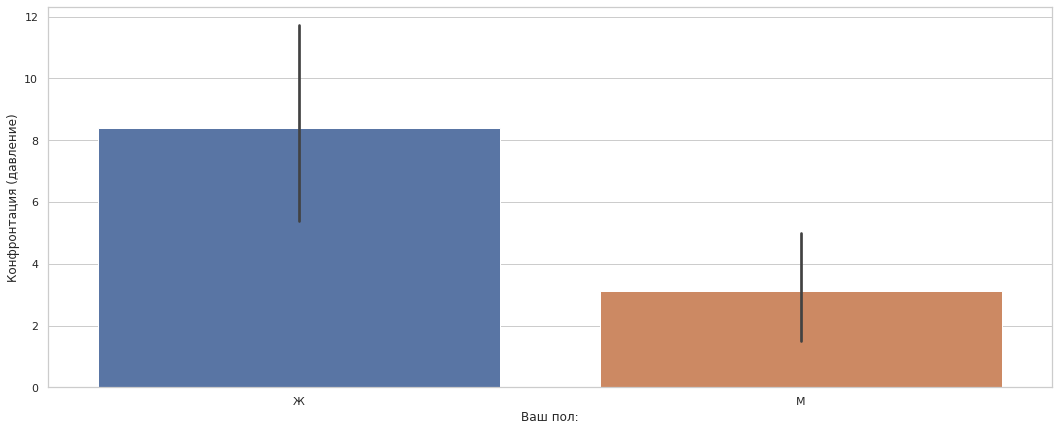

In [37]:
sns.barplot(data = Thomas_Kilman_Results, x = 'Ваш пол:' , y = 'Конфронтация (давление)')

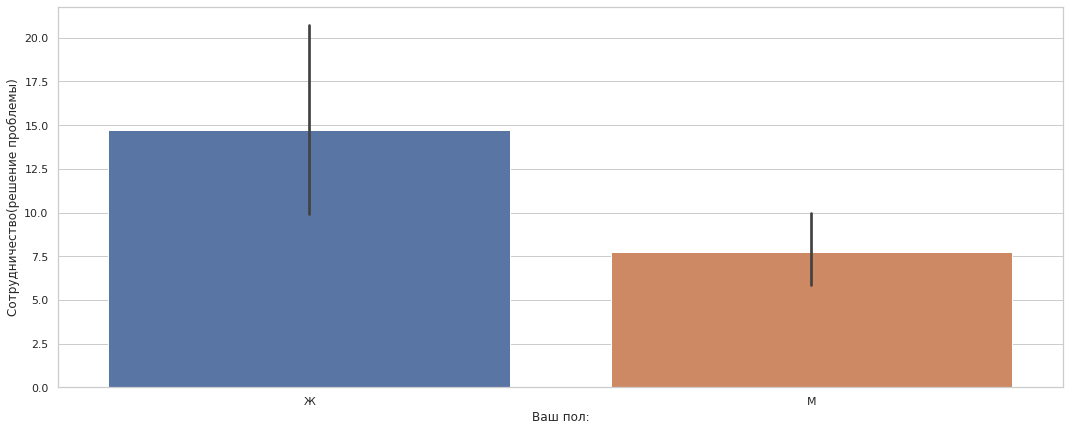

In [38]:
sns.barplot(data = Thomas_Kilman_Results, x = 'Ваш пол:', y = 'Сотрудничество(решение проблемы)')


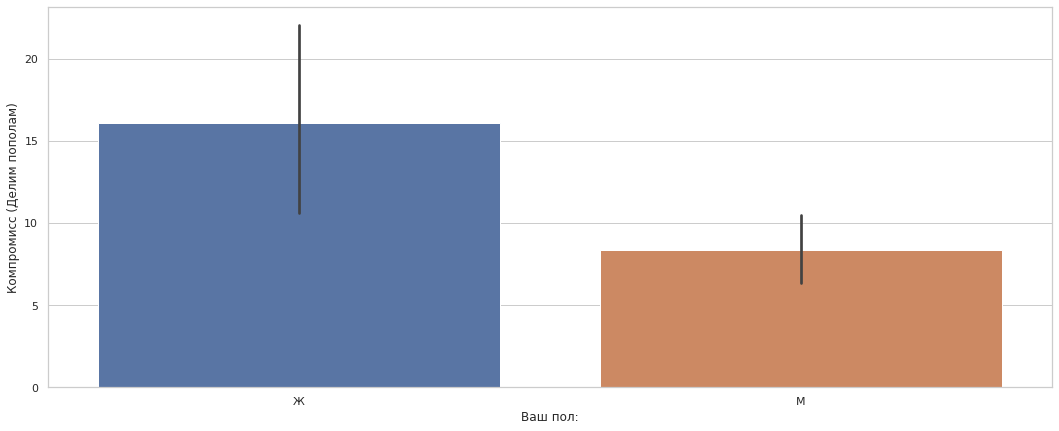

In [39]:
sns.barplot(data = Thomas_Kilman_Results, x = 'Ваш пол:', y = 'Компромисс (Делим пополам)')

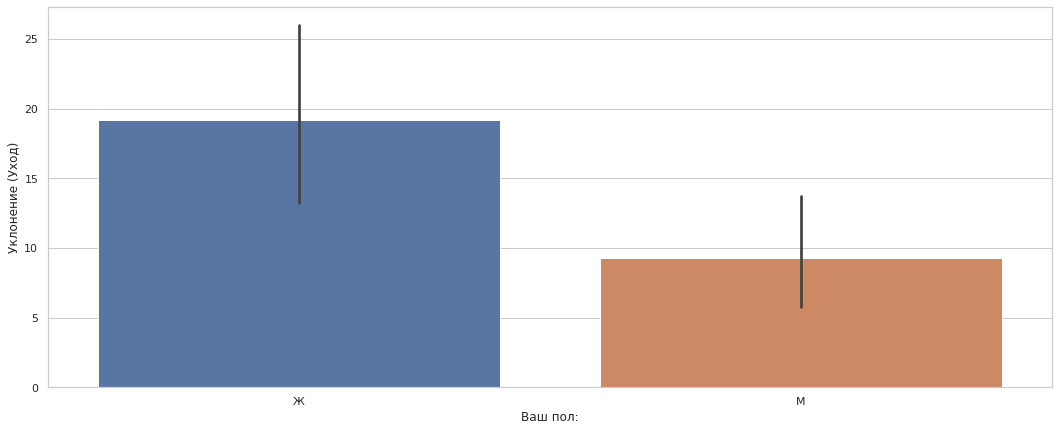

In [40]:
sns.barplot(data = Thomas_Kilman_Results, x = 'Ваш пол:', y = 'Уклонение (Уход)')

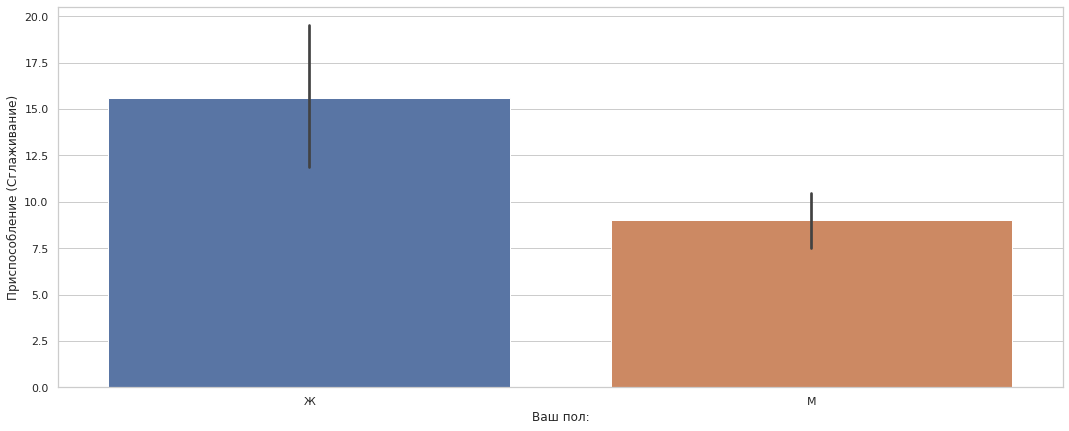

In [41]:
sns.barplot(data = Thomas_Kilman_Results, x = 'Ваш пол:' , y = 'Приспособление (Сглаживание)')

### Опросник 2

In [42]:
somo = df_clean.iloc[:,[1,2]+list(range(34,74))]

In [43]:
somo.columns = somo.columns.str.replace('\n','')

In [44]:
somo.head()

,Ваш возраст:,Ваш пол:,1. Обычно я стараюсь не создавать слишком близких отношений с людьми.,2. Я всегда стремлюсь доказать свою правоту.,"3. Если я не одобряю поведение другого человека, то даю ему это почувствовать.","4. Бывает, я чувствую, что в отношениях что-то не так.",5. Я стараюсь сохранять дистанцию в отношениях с людьми.,6. Я всегда отстаиваю свою точку зрения.,7. Я часто бываю не согласен с людьми.,8. Отношения с другими людьми часто беспокоят меня.,...,31. Я сомневаюсь в искренности других людей в отношениях со мной.,32. Мне трудно идти на компромисс в отношениях с другими людьми.,33. Я бываю грубоват в отношениях с людьми.,34. Я стараюсь не проявлять свои чувства в отношениях с людьми.,35. Мысль о предстоящей встрече вызывает у меня внутреннее напряжение.,36. Я чувствую «недосказанность» в отношениях с людьми.,37. Я стараюсь не обсуждать свои проблемы с другими людьми.,"38. У меня возникает чувство, что отношения могут прекратиться в любую минуту.","39. Я чувствую, что люди не понимают или не хотят понимать меня.","40. В отношениях с людьми у меня возникают вопросы: «почему так происходит?», «зачем все это?»."
0,22,Ж,2,4,4,4,NaN,5,3,2,...,2,2,2,2,2,2,4,2,2,2
2,19,Ж,2,3,3,7,3.0,2,6,6,...,4,4,4,3,6,6,2,4,3,4
3,20,Ж,4,5,6,7,5.0,5,6,5,...,6,7,6,5,6,7,7,7,7,6
4,20,Ж,1,2,2,6,1.0,2,4,4,...,1,1,3,1,1,1,1,1,1,2
5,19,Ж,4,3,4,5,3.0,4,4,5,...,3,3,4,3,3,3,4,5,5,5


In [45]:
somo_keys = {"H":['4.', '8.', '11.', '19.', '22.', '26.', '30.', '35.', '36.', '38.', '40.'],
            "O":['1.', '5.', '9.', '12.', '15.', '23.', '27.', '31.', '34.', '37.', '39.'],
            "K":['2.', '6.', '13.', '16.', '18.', '20.', '24.', '28.', '32.'],
            "A":['3.', '7.', '10.', '14.', '17.', '21.', '25.', '29.', '33.']}

somo_keys = pd.DataFrame([(num,key) for key, nums in somo_keys.items() for num in nums])
somo_keys.columns = ['Question','Key']

In [46]:
somo_keys

,Question,Key
0,4.,H
1,8.,H
2,11.,H
3,19.,H
4,22.,H
5,26.,H
6,30.,H
7,35.,H
8,36.,H
9,38.,H


In [47]:
mapping_dict = {}
for index,row in somo_keys.iterrows():
     mapping_dict.update({col: row[1] for col in somo.columns if col.startswith(row[0])})
somo = somo.rename(columns=mapping_dict)


In [48]:
somo.head()

,Ваш возраст:,Ваш пол:,O,K,A,H,O,K,A,H,...,O,K,A,O,H,H,O,H,O,H
0,22,Ж,2,4,4,4,NaN,5,3,2,...,2,2,2,2,2,2,4,2,2,2
2,19,Ж,2,3,3,7,3.0,2,6,6,...,4,4,4,3,6,6,2,4,3,4
3,20,Ж,4,5,6,7,5.0,5,6,5,...,6,7,6,5,6,7,7,7,7,6
4,20,Ж,1,2,2,6,1.0,2,4,4,...,1,1,3,1,1,1,1,1,1,2
5,19,Ж,4,3,4,5,3.0,4,4,5,...,3,3,4,3,3,3,4,5,5,5


In [49]:
somo = somo.groupby(somo.columns, axis=1).agg(sum)
cols = somo.columns.tolist()
cols = cols[-2:] + cols[:-2]
somo = somo[cols]
somo.iloc[:,2:] = somo.iloc[:,2:].astype('Int64')
somo.iloc[:,0] = somo.iloc[:,0].astype('Int64')
somo = somo.rename(columns = {'A':'Агрессия','H':'Напряженность', 'K':'Конфликтность','O':'Отчужденность'})

In [50]:
somo.head()

,Ваш возраст:,Ваш пол:,Агрессия,Напряженность,Конфликтность,Отчужденность
0,22,Ж,23,26,28,22
2,19,Ж,34,65,40,34
3,20,Ж,46,72,47,61
4,20,Ж,23,25,18,18
5,19,Ж,38,47,30,42


### Опросник 3

In [51]:
ryff = df_clean.iloc[:,[1,2]+list(range(74,df_clean.shape[1]))]
ryff_pwb = ryff
ryff.columns = ryff.columns.str.replace('\n','')

In [52]:
ryff_keys = 0
data = [['Позитивные отношения',[1, 19, 25, 37, 49, 67, 79],[7, 13, 31, 43, 55, 61, 73]],
        ['Автономия',[8, 14, 26, 38, 50, 68, 80],[2, 20, 32, 44, 56, 62, 74]],
        ['Управление средой',[3, 21, 33, 39, 51, 57, 69, 81],[9, 15, 27, 45, 63, 75]],
        ['Личностный рост',[10, 16, 28, 40, 46, 52, 64, 70],[4, 22, 34, 58, 76, 82]],
        ['Цели в жизни',[5, 23, 47, 53, 59, 71, 77],[11, 17, 29, 35, 41, 65, 83]],
        ['Самопринятие',[6, 12, 30, 36, 48, 72, 78],[18, 24, 42, 54, 60, 66, 84]],
        ['Психологическое благополучие',[1, 3, 5, 6, 8, 10, 12, 14, 16, 19, 21, 23, 25, 26, 28, 30, 33, 36, 37, 38, 39, 40, 46, 47, 48, 49, 50, 51, 52, 53, 57, 59, 64, 67, 68, 69, 70, 72, 71, 77, 78, 79, 80, 81],[2, 4, 7, 9, 11, 13, 15, 17, 20, 22, 27, 29, 31, 32, 34, 35, 18, 24, 41, 42, 43, 44, 45, 54, 55, 56, 58, 60, 61, 62, 63, 65, 66, 73, 74, 75, 76, 82, 83, 84]]
       ]
       
columns = ['Шкала', 'Прямые утверждения',
       'Обратные утверждения']

ryff_keys = pd.DataFrame(data, columns = columns)

In [53]:
# ryff_keys_transp = ryff_keys.transpose()
# ryff_keys_transp.columns = ryff_keys_transp.iloc[0]
# ryff_keys_transp = ryff_keys_transp.tail(-1)

In [54]:
ryff_keys

,Шкала,Прямые утверждения,Обратные утверждения
0,Позитивные отношения,"[1, 19, 25, 37, 49, 67, 79]","[7, 13, 31, 43, 55, 61, 73]"
1,Автономия,"[8, 14, 26, 38, 50, 68, 80]","[2, 20, 32, 44, 56, 62, 74]"
2,Управление средой,"[3, 21, 33, 39, 51, 57, 69, 81]","[9, 15, 27, 45, 63, 75]"
3,Личностный рост,"[10, 16, 28, 40, 46, 52, 64, 70]","[4, 22, 34, 58, 76, 82]"
4,Цели в жизни,"[5, 23, 47, 53, 59, 71, 77]","[11, 17, 29, 35, 41, 65, 83]"
5,Самопринятие,"[6, 12, 30, 36, 48, 72, 78]","[18, 24, 42, 54, 60, 66, 84]"
6,Психологическое благополучие,"[1, 3, 5, 6, 8, 10, 12, 14, 16, 19, 21, 23, 25...","[2, 4, 7, 9, 11, 13, 15, 17, 20, 22, 27, 29, 3..."


In [55]:
ryff.head()

,Ваш возраст:,Ваш пол:,1. Большинство моих знакомых считает меня любящим и преданным человеком.,"2. Иногда я меняю свое поведение или образ мышления, чтобы не выделяться.","3. Как правило, я считаю себя в ответе за то, как я живу.","4. Меня не интересуют занятия, которые принесут результат в отдаленном будущем.","5. Мне приятно думать о том, что я совершил в прошлом и надеюсь совершить в будущем.","6. Когда я оглядываюсь назад, мне нравится, как сложилась моя жизнь.",7. Поддержание близких отношений было связано для меня с трудностями и разочарованиями.,"8. Я не боюсь высказывать свое мнение, даже если оно противоречит мнению большинства.",...,"75. Мне трудно обустроить свою жизнь так, как хотелось бы.",76. Я уже давно не пытаюсь изменить или улучшить свою жизнь.,"77. Мне приятно думать о том, чего я достиг в жизни.","78. Когда я сравниваю себя со своими друзьями и знакомыми то понимаю, что я во многом лучше их.",79. Мы с моими друзьями относимся с сочувствием к проблемам друг друга.,"80. Я сужу о себе исходя из того, что я считаю важным, а не из того, что считают важным другие.","81. Мне удалось создать себе такое жилище и такой образ жизни, которые мне очень нравятся.",82. Старого пса не научить новым трюкам.,"83. Я не уверен, что мне стоит чего-то ждать от жизни.","84. Каждый имеет недостатки, но у меня их больше чем у других."
0,22,Ж,5,4,6,2,4,5,2,4,...,3,2,5,3,5,5,4,2,2,2
2,19,Ж,4,3,4,2,4,4,5,2,...,6,2,4,3,6,4,4,2,2,2
3,20,Ж,4,6,6,4,5,4,4,5,...,6,5,6,5,6,6,3,6,4,3
4,20,Ж,5,4,6,1,3,2,1,3,...,5,2,2,2,5,4,2,2,2,4
5,19,Ж,5,3,3,2,3,4,3,5,...,3,2,4,4,4,5,3,2,2,3


In [56]:
mapping_dict = {}
for col in ryff.iloc[:,2:].columns:
    for index,val in ryff[col].iteritems():
        for idx,row in ryff_keys[:6].iterrows():
            if int(col[0]) in row[1]:
#                 print(col[0], val, row[1], row[0],'Прямые утверждения')
                mapping_dict.update({col: row[0]})
            elif int(col[0]) in row[2]:
#                 print(col[0], 7-val, row[1], row[0],'Обратные утверждения')
                mapping_dict.update({col: row[0]})
                ryff[col][index]=7-val
ryff = ryff.rename(columns=mapping_dict)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/tljh/user/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [57]:
ryff = ryff.groupby(ryff.columns, axis=1).agg(sum)
cols = ryff.columns.tolist()
cols = [cols[1]] + [cols[2]] + [cols[4]] + [cols[0]] + [cols[6]] + [cols[3]] + [cols[-1]] + [cols[5]]
ryff = ryff[cols]
ryff.iloc[:,0] = ryff.iloc[:,0].astype('Int64')

In [58]:
ryff.head()

,Ваш возраст:,Ваш пол:,Позитивные отношения,Автономия,Управление средой,Личностный рост,Цели в жизни,Самопринятие
0,22,Ж,82,54,50,40,38,36
2,19,Ж,66,48,40,38,42,36
3,20,Ж,70,51,55,30,46,50
4,20,Ж,79,54,42,36,37,36
5,19,Ж,81,56,40,37,44,35


In [59]:
ryff_keys[6:]

,Шкала,Прямые утверждения,Обратные утверждения
6,Психологическое благополучие,"[1, 3, 5, 6, 8, 10, 12, 14, 16, 19, 21, 23, 25...","[2, 4, 7, 9, 11, 13, 15, 17, 20, 22, 27, 29, 3..."


In [60]:
mapping_dict = {}
for col in ryff_pwb.iloc[:,2:].columns:
    for index,val in ryff_pwb[col].iteritems():
        for idx,row in ryff_keys[6:].iterrows():
#                 print(col[0], val, row[1], row[0])            
            if int(col[0]) in row[1]:
                mapping_dict.update({col: row[0]})
            elif int(col[0]) in row[2]:
                mapping_dict.update({col: row[0]})
                ryff_pwb[col][index]=7-val
ryff_pwb = ryff_pwb.rename(columns=mapping_dict)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/tljh/user/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [61]:
ryff_pwb = ryff_pwb.groupby(ryff_pwb.columns, axis=1).agg(sum)
ryff_pwb.iloc[:,0] = ryff_pwb.iloc[:,0].astype('Int64')

In [62]:
ryff_pwb.head()

,Ваш возраст:,Ваш пол:,Психологическое благополучие
0,22,Ж,304
2,19,Ж,308
3,20,Ж,386
4,20,Ж,280
5,19,Ж,307


In [63]:
ryff.dtypes

Ваш возраст:             Int64
Ваш пол:                object
Позитивные отношения     int64
Автономия                int64
Управление средой        int64
Личностный рост          int64
Цели в жизни             int64
Самопринятие             int64
dtype: object

In [64]:
ryff_pwb.dtypes

Ваш возраст:                     Int64
Ваш пол:                        object
Психологическое благополучие     int64
dtype: object

In [65]:
ryff.merge(ryff_pwb, how ='left',on = ['Ваш возраст:','Ваш пол:'])

,Ваш возраст:,Ваш пол:,Позитивные отношения,Автономия,Управление средой,Личностный рост,Цели в жизни,Самопринятие,Психологическое благополучие
0,22,Ж,82,54,50,40,38,36,304
1,22,Ж,82,54,50,40,38,36,397
2,19,Ж,66,48,40,38,42,36,308
3,19,Ж,66,48,40,38,42,36,307
4,20,Ж,70,51,55,30,46,50,386
...,...,...,...,...,...,...,...,...,...
134,25,Ж,75,61,44,40,44,34,360
135,25,Ж,75,61,44,40,44,34,305
136,25,Ж,75,61,44,40,44,34,260
137,25,Ж,75,61,44,40,44,34,268
